<a href="https://colab.research.google.com/github/Marisa33/Women_Nobel_Prize/blob/main/Copia_de_WomenAndNobelPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyección de las Mujeres en los Premios Nobel**


##**ÍNDICE**




1.   Introducción
2.   Integración de Líbrerias
3.   Carga de datos
4.   Transformación de los datos

## **Introducción**



A lo largo del tiempo se han encontrado diferentes descubrimientos en diferentes ambitos. Desde la organización de los Premios Nobel y otras organizaciones de prestigio han otorgado reconocimientos a cada uno de los investigadores de estos hechos. 
Desde este proyecto se quiere analizar cada uno de los descubrimientos a lo largo del tiempo. Pero el objetivo principal que se tiene es descubrir la proyección de los distintos descubrimientos. Pero para ello se deben analizar distintos aspectos como:


*   Analizar el nivel educativo y economico de los distintos países del mundo. Esto nos permite visualizar que países tienen una mayor capacidad de investigación. Algunos de los aspectos que se tomaran en cuenta son:
    -  Inversiones en investigación
    -  Diferencia economica entre los países
    -  Número de universidades
    -  Calidad educativa
*   Analizar los aspectos socioculturales vividos a lo largo de la historia.
    -  Diferencia de género
    -  Crisis economicas
    -  Conflictos belicos





##**Integración de Líbrerias**



Para la realización del analisis se deberá importar diferentes librerías que nos permitirán tratar y visualizar los diferentes datos. En nuestro caso hemos  utilizado (según función):


*   Tratar Datos:
    -   Pandas
    -   Numpy 
    -   Datatime
*  Visualizar
    -   Matplotlib
    -   Seaborn


Para incluir las distantas librerías que vamos utilizar se deberán primero instalar y seguidamente importarlas. 

En nuestro caso, como se está trabajando desde Google Colab, algunas de estas librerías ya instaladas y no hará falta realizar la instalación. Pero en el caso de que se quiera importar el Jupyter Notebook del proyecto a otro marco, sí que se deberá realizar la instalación de cada una de ellas. Por está razón, se ha añadido la parte de código que realiza la instalación de las librerías. Esta parte de código estará comentada. Por lo tanto, se deberá descomentar para poder realizar la instalación de las libreráis. 


In [ ]:
# To install the current version of the librarie NUMPY: 
# !pip install --upgrade numpy
# To install the current version of the librarie PANDA: 
# !pip install --upgrade panda

 Una vez instaladas las librerías se podran importar las librerías necesarias para el proyecto.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta, MO
from pandas import DataFrame
import math
import seaborn as sns
from seaborn import load_dataset


Ahora ya se podrán utilizar las distintas librerías a lo largo del trabajo. Ahora pasaremos a realizar la importación de los datos.

##**Importación de Datos**

In [ ]:
url_archive = 'https://raw.githubusercontent.com/Marisa33/Women_Nobel_Prize/main/archive.csv'
url_economic = 'https://raw.githubusercontent.com/Marisa33/Women_Nobel_Prize/main/economic_freedom_index2019_data.csv'
url_university = 'https://raw.githubusercontent.com/Marisa33/Women_Nobel_Prize/main/timesData.csv'

In [ ]:
df_archive= pd.read_csv(url_archive)
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize_Share           969 non-null    object
 5   Laureate_ID           969 non-null    int64 
 6   Laureate_Type         969 non-null    object
 7   Full_Name             969 non-null    object
 8   Birth_Date            940 non-null    object
 9   Birth_City            941 non-null    object
 10  Birth_Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization_Name     722 non-null    object
 13  Organization_City     716 non-null    object
 14  Organization_Country  716 non-null    object
 15  Death_Date            618 non-null    ob

In [ ]:
df_economic = pd.read_csv(url_economic)
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

In [ ]:
df_university = pd.read_csv(url_university)
df_university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [ ]:
df_archive = df_archive.sort_values(['Year', 'Category', 'Sex', 'Full_Name'])

In [ ]:
df_archive.head(10)

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,Birth_Country,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland


In [ ]:
df_economic.head(10)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,84.7,79.0,53.0,78.3,71.4,77.8,80.8,75.0,70.0,2.1,26.0,20.0,21.3,26.4,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,86.6,87.6,80.0,90.0,1.2,45.0,30.0,28.2,36.5,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,50.5,24.5,85.5,74.9,68.7,81.5,86.0,90.0,70.0,2.0,50.0,25.0,42.7,50.2,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,87.5,59.5,89.4,69.5,63.9,63.0,74.6,60.0,60.0,5.2,25.0,20.0,15.0,36.7,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,68.5,67.5,78.1,47.8,50.0,60.0,18.6,0.0,0.0,16.3,21.0,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


In [ ]:
df_university.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


Convertimos el tipo de dato, *object*, de las fechas de nacimiento y de muerte a tipo de dato *datetime*. 

In [ ]:
df_archive['Birth_Date']= pd.to_datetime(df_archive['Birth_Date'], format='%Y-%m-%d')
df_archive['Death_Date']= pd.to_datetime(df_archive['Death_Date'], format='%Y-%m-%d')

Una vez tenemos las fechas con el tipo de dato datetime, ya podemos realizar operaciones de con ellas. 

Ahora ya se podrá saber la edad de cada uno de los premiados. En el caso de estar fallecidos, se realizará la resta de la edad de fallecimiento y la edad de nacimiento. En el caso de seguir vivo, se realizará la resta de la fecha actual y la fecha de nacimiento. 


In [ ]:
df_archive["Edad"] = (df_archive.Death_Date - df_archive.Birth_Date)

In [ ]:
df_archive['Edad'] = df_archive['Edad'].fillna((datetime.today() - df_archive.Birth_Date))

El resultado de las restas nos aparece en minutos. Por lo tanto, convertiremos el dato a año y eliminaremos los decimales para conseguir un entero. 

In [ ]:
df_archive["Edad"] = df_archive.Edad / np.timedelta64(1, 'Y')
df_archive["Edad"]= df_archive["Edad"].map('{:,.0f}'.format)

In [ ]:
df_archive['Year']= pd.to_datetime(df_archive['Year'], format='%Y')
df_archive["Edad_Premio"] = (df_archive.Year - df_archive.Birth_Date)
df_archive["Edad_Premio"] = df_archive.Edad_Premio / np.timedelta64(1, 'Y')
df_archive["Edad_Premio"]= df_archive["Edad_Premio"].map('{:,.0f}'.format)

In [ ]:
df_archive.head(10)

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,Birth_Country,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,Edad,Edad_Premio
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,58,48
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,68,62
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,63,47
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,90,79
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,82,73
5,1901-01-01,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,78,56
6,1902-01-01,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,67,49
7,1902-01-01,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,86,84
8,1902-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,75,45
10,1902-01-01,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland,71,59


In [ ]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 968
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  969 non-null    datetime64[ns]
 1   Category              969 non-null    object        
 2   Prize                 969 non-null    object        
 3   Motivation            881 non-null    object        
 4   Prize_Share           969 non-null    object        
 5   Laureate_ID           969 non-null    int64         
 6   Laureate_Type         969 non-null    object        
 7   Full_Name             969 non-null    object        
 8   Birth_Date            940 non-null    datetime64[ns]
 9   Birth_City            941 non-null    object        
 10  Birth_Country         943 non-null    object        
 11  Sex                   943 non-null    object        
 12  Organization_Name     722 non-null    object        
 13  Organization_City   

In [ ]:
df_archive.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize_Share               0
Laureate_ID               0
Laureate_Type             0
Full_Name                 0
Birth_Date               29
Birth_City               28
Birth_Country            26
Sex                      26
Organization_Name       247
Organization_City       253
Organization_Country    253
Death_Date              351
Death_City              369
Death_Country           363
Edad                      0
Edad_Premio               0
dtype: int64

In [ ]:
df_archive.head(700)

,Year,Category,Prize,Motivation,Prize_Share,Laureate_ID,Laureate_Type,Full_Name,Birth_Date,Birth_City,Birth_Country,Sex,Organization_Name,Organization_City,Organization_Country,Death_Date,Death_City,Death_Country,Edad,Edad_Premio
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,58,48
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,68,62
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,63,47
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,90,79
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,82,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1996-01-01,Physics,The Nobel Prize in Physics 1996,"""for their discovery of superfluidity in heliu...",1/3,149,Individual,David M. Lee,1931-01-20,"Rye, NY",United States of America,Male,Cornell University,"Ithaca, NY",United States of America,NaT,NaN,NaN,90,65
696,1996-01-01,Physics,The Nobel Prize in Physics 1996,"""for their discovery of superfluidity in heliu...",1/3,150,Individual,Douglas D. Osheroff,1945-08-01,"Aberdeen, WA",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaT,NaN,NaN,76,50
697,1996-01-01,Physics,The Nobel Prize in Physics 1996,"""for their discovery of superfluidity in heliu...",1/3,151,Individual,Robert C. Richardson,1937-06-26,"Washington, DC",United States of America,Male,Cornell University,"Ithaca, NY",United States of America,2013-02-19,"Ithaca, NY",United States of America,76,59
700,1997-01-01,Chemistry,The Nobel Prize in Chemistry 1997,"""for the first discovery of an ion-transportin...",1/2,289,Individual,Jens C. Skou,1918-10-08,Lemvig,Denmark,Male,Aarhus University,Aarhus,Denmark,2018-05-28,Risskov,Denmark,100,78


https://www.delftstack.com/es/howto/python/how-to-convert-string-to-datetime/
https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
https://seaborn.pydata.org/


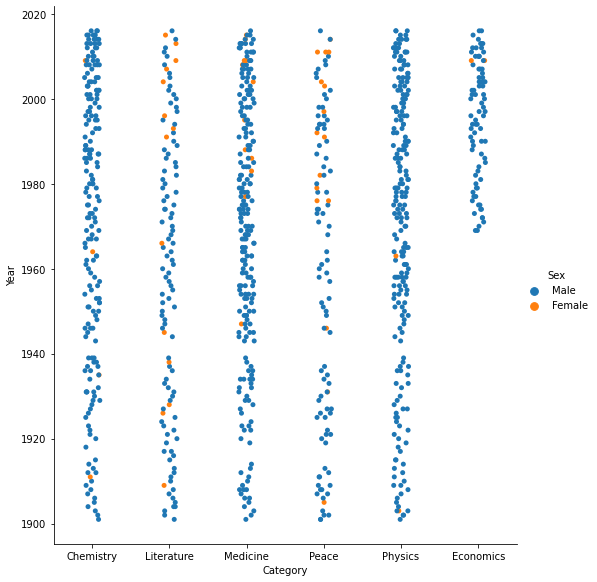

In [ ]:
sns.catplot(x="Category", y="Year", hue="Sex", data=df_archive, height=8, aspect=.9);

In [197]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
import bokeh.sampledata
bokeh.sampledata.download()

Creating /root/.bokeh directory
Creating /root/.bokeh/data directory
Using data directory: /root/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_e

In [199]:
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties

palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)